In [1]:
from models.multilayer_perceptron import MLP

desire = 'Eat'
choice_type = 'mode'
experiment_id = 'mlp01'

model = MLP(data_dir='data')

for num_sample in range(1, 21, 1):
    num_sample = num_sample * 1000
    print(f"experiment_id: {experiment_id}, num_sample: {num_sample}")
    model.run_experiment(experiment_id, num_sample, desire, choice_type)

experiment_id: mlp01, num_sample: 1000
best_params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
loss: 1.0015851077651585
brier_score: 0.20160006175601466
mean_error: 0.24328930968313434 

experiment_id: mlp01, num_sample: 2000
best_params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
loss: 0.9804415014908013
brier_score: 0.19745430901236252
mean_error: 0.18869378022726413 

experiment_id: mlp01, num_sample: 3000
best_params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
loss: 0.9812563202104341
brier_score: 0.1976090836854904
mean_error: 0.16277217831822743 

experiment_id: mlp01, num_sample: 4000
best_params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.0001, 'solver': 'adam'}
loss: 0.9869366987902739
brier_score: 0.198299

In [5]:
import os
import json
import pandas as pd
import numpy as np


experiment_dir = f'data/experiments/{experiment_id}'
columns = ['experiment_id', 'num_sample', 'desire', 'choice_type', 'loss', 'brier_score', 'age_group_error',
           'income_group_error', 'family_structure_error', 'household_size_error', 'vehicles_error', 'mean_error']
experiment_results = pd.DataFrame(columns=columns)
for file in os.listdir(experiment_dir):
    if file.endswith('.json'):
        with open(os.path.join(experiment_dir, file)) as f:
            experiment_results.loc[len(experiment_results)] = json.load(f)
experiment_results.head()

,experiment_id,num_sample,desire,choice_type,loss,brier_score,age_group_error,income_group_error,family_structure_error,household_size_error,vehicles_error,mean_error
0,mlp01,2000,Eat,mode,0.980442,0.197454,0.204205,0.156289,0.133869,0.120554,0.188694,0.160722
1,mlp01,11000,Eat,mode,0.983869,0.197546,0.186955,0.193363,0.163303,0.173215,0.218859,0.187139
2,mlp01,18000,Eat,mode,0.983053,0.197444,0.179842,0.203053,0.173394,0.192417,0.232878,0.196317
3,mlp01,36000,Eat,mode,0.979319,0.196568,0.169540,0.166738,0.149636,0.162674,0.203829,0.170484
4,mlp01,26000,Eat,mode,0.981970,0.197206,0.200366,0.202527,0.191524,0.216656,0.257623,0.213739


In [8]:
experiment_results = experiment_results[experiment_results['num_sample'] <= 20000]

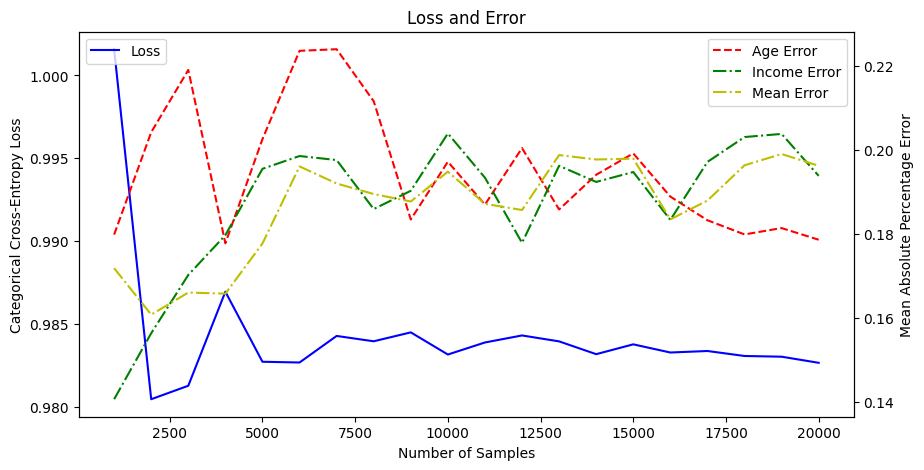

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot accuracy on the primary y-axis
sns.lineplot(data=experiment_results, x='num_sample',
             y='loss', ax=ax1, color='b', label='Loss')
# sns.lineplot(data=experiment_results, x='num_sample',
#              y='brier_score', ax=ax1, color='#880E4F', label='Average Brier Score')

ax1.set_title('Loss and Error')
ax1.set_xlabel('Number of Samples')
ax1.set_ylabel('Categorical Cross-Entropy Loss')
ax1.legend(loc='upper left')

# Create a second y-axis for the errors
ax2 = ax1.twinx()
sns.lineplot(data=experiment_results, x='num_sample', y='age_group_error',
             ax=ax2, color='r', linestyle='--', label='Age Error')
sns.lineplot(data=experiment_results, x='num_sample', y='income_group_error',
             ax=ax2, color='g', linestyle='-.', label='Income Error')
sns.lineplot(data=experiment_results, x='num_sample', y='mean_error',
             ax=ax2, color='y', linestyle='-.', label='Mean Error')
ax2.set_ylabel('Mean Absolute Percentage Error')
ax2.legend(loc='upper right')

# Optional: Set xticks if needed
# ax1.set_xticks(experiment_results['num_sample'])

plt.show()